In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# loading clean data

In [5]:
import os
path_clean_files = '../data/cleaned_data'
clean_files = [path_clean_files + '/' + files for files in os.listdir(path_clean_files)]

In [6]:
dfs = []
for file in clean_files:
    dfs.append(pd.read_csv(file, index_col = 0))
df = pd.concat(dfs, axis = 0)

In [7]:
df.index = pd.to_datetime(df.index)

In [8]:
df

,battery_id,battery_voltage,current,current_in,current_out,panel_voltage,state_of_charge_percent,temperature,usb_current,voltage,...,usb_power,other_out_current,bool_current_out,bool_current_in,power_in,net_power_battery,hour,minutes,day_n,hour:min
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-02-16 13:00:00,50,6.940,-2.466,2.468,0.002,7.0600,55.0,30.785077,0.002,7.045,...,0.01388,0.000,0.0,1.0,17.127920,17.114040,13,0,1,13:0
2021-02-16 13:10:00,50,6.950,-2.476,2.478,0.002,7.0700,59.0,31.421378,0.002,7.050,...,0.01390,0.000,0.0,1.0,17.222100,17.208200,13,10,1,13:10
2021-02-16 13:20:00,50,6.960,-2.492,2.494,0.002,7.0850,63.0,31.952392,0.002,7.065,...,0.01392,0.000,0.0,1.0,17.358240,17.344320,13,20,1,13:20
2021-02-16 13:30:00,50,6.970,-2.492,2.494,0.002,7.0900,68.0,32.394141,0.002,7.070,...,0.01394,0.000,0.0,1.0,17.383180,17.369240,13,30,1,13:30
2021-02-16 13:40:00,50,6.975,-2.495,2.497,0.002,7.0950,72.0,32.813001,0.002,7.075,...,0.01395,0.000,0.0,1.0,17.416575,17.402625,13,40,1,13:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25 07:00:00,99,6.795,-0.890,1.223,0.333,6.8375,52.5,26.906615,0.322,6.770,...,2.18799,0.011,1.0,1.0,8.310460,6.047730,7,0,4,7:0
2021-06-25 07:10:00,99,6.845,-1.278,1.352,0.074,6.9050,54.0,27.102312,0.012,6.835,...,0.08214,0.062,1.0,1.0,9.254440,8.747910,7,10,4,7:10
2021-06-25 07:20:00,99,6.825,-1.086,1.422,0.336,6.8800,56.0,27.608148,0.326,6.805,...,2.22495,0.010,1.0,1.0,9.705150,7.411950,7,20,4,7:20


# Viz

<AxesSubplot:xlabel='day_n,hour,minutes'>

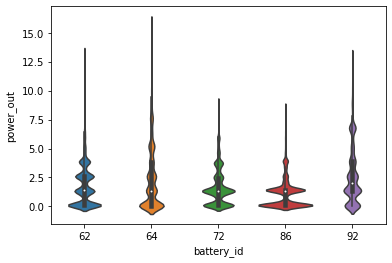

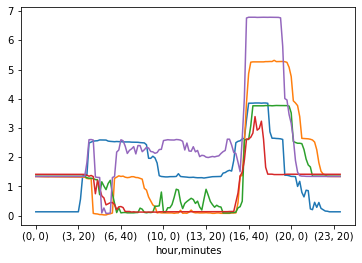

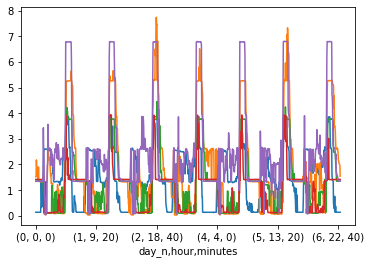

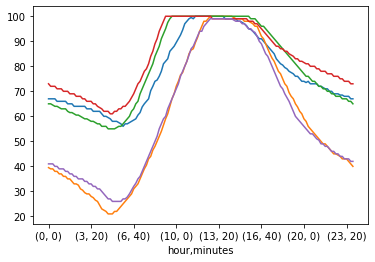

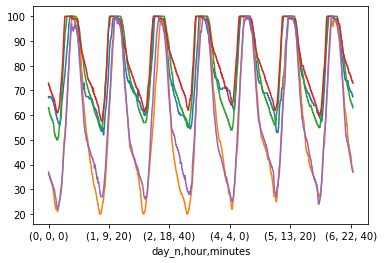

In [5]:
n = 5
randoms_ids = np.random.choice(df.battery_id.unique(), n)

subset = df[df['battery_id'].isin(randoms_ids)]

sns.violinplot(data = subset, x = 'battery_id', y="power_out")

weekly_median_profiles = subset.groupby(['battery_id','day_n','hour','minutes']).median()
daily_median_profiles = subset.groupby(['battery_id','hour','minutes']).median()

daily_median_profiles['power_out'].unstack(level = 0).sort_index().plot(subplots = False, legend = False)
weekly_median_profiles['power_out'].unstack(level = 0).sort_index().plot(subplots = False, legend = False)

daily_median_profiles['state_of_charge_percent'].unstack(level = 0).sort_index().plot(subplots = False, legend = False)
weekly_median_profiles['state_of_charge_percent'].unstack(level = 0).sort_index().plot(subplots = False, legend = False)

<AxesSubplot:xlabel='day_n,hour,minutes'>

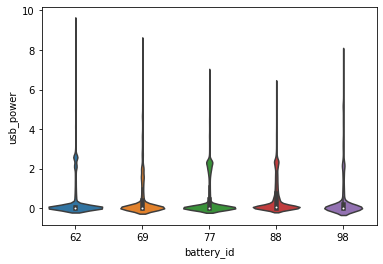

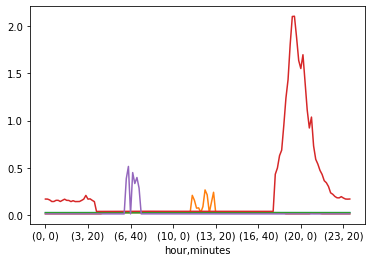

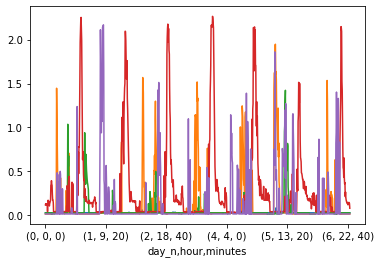

In [17]:
sns.violinplot(data = subset, x = 'battery_id', y="usb_power")

weekly_median_profiles = subset.groupby(['battery_id','day_n','hour','minutes']).median()
daily_median_profiles = subset.groupby(['battery_id','hour','minutes']).median()

daily_median_profiles['usb_power'].unstack(level = 0).sort_index().plot(subplots = False, legend = False)
weekly_median_profiles['usb_power'].unstack(level = 0).sort_index().plot(subplots = False, legend = False)

<AxesSubplot:title={'center':'mean power_out per soc_bin'}, xlabel='binned_soc'>

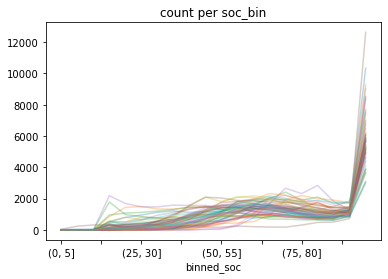

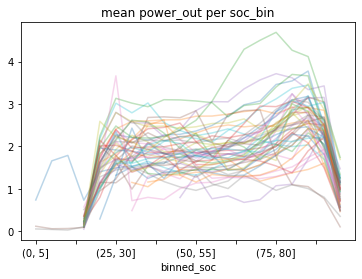

In [15]:
increment = 5
df['binned_soc'] = pd.cut(df['state_of_charge_percent'], np.arange(0,100+increment,increment))
count = df.groupby(['battery_id','binned_soc'])['state_of_charge_percent'].count()
binned_soc = df.groupby(['battery_id','binned_soc']).mean()
binned_soc['count'] = count

binned_soc['count'].unstack(level = 0).plot(legend = False, alpha = 0.3, title = 'count per soc_bin')
binned_soc['power_out'].unstack(level = 0).plot(legend = False, alpha = 0.3, title = 'mean power_out per soc_bin')

In [18]:
df = df.reset_index().set_index(['timestamp','battery_id'])
df = df.sort_index()

In [19]:
df['observed_mileage'] = df.groupby('battery_id')['power_out'].transform('cumsum')

<AxesSubplot:title={'center':'mileage (cumulative sum of output power)'}, xlabel='timestamp'>

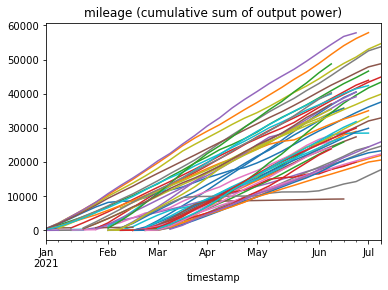

In [22]:
df['observed_mileage'].unstack(level = 1).resample('1W').mean().plot(legend = False, title = 'mileage (cumulative sum of output power)')

# little fun

In [26]:
print(df.index.min(), df.index.max())

2021-01-01 00:00:00 2021-07-10 04:40:00


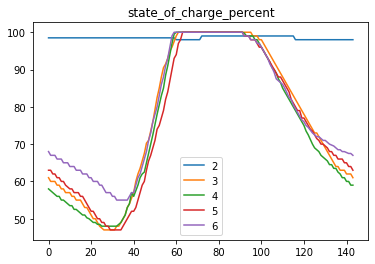

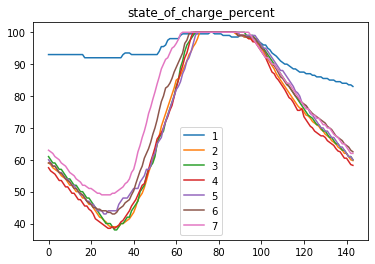

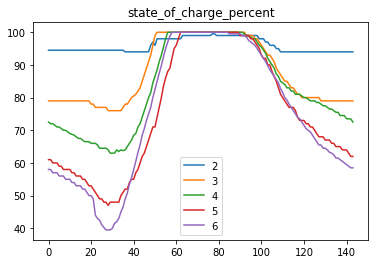

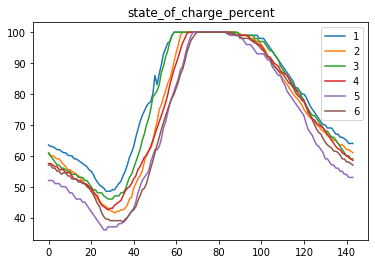

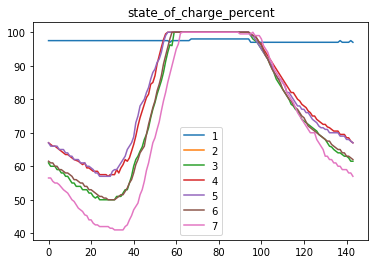

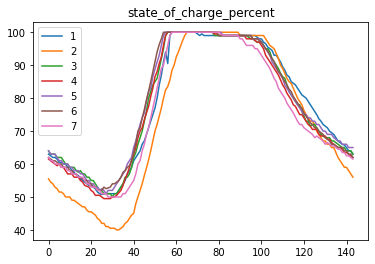

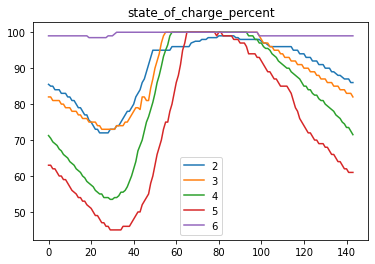

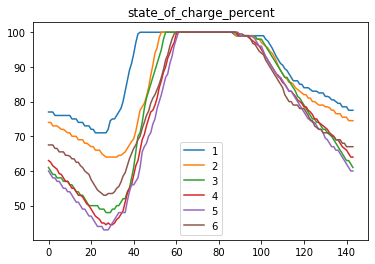

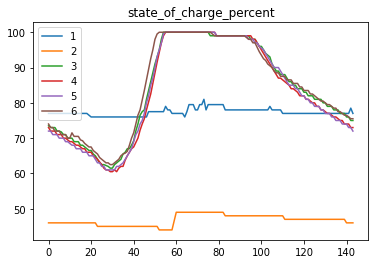

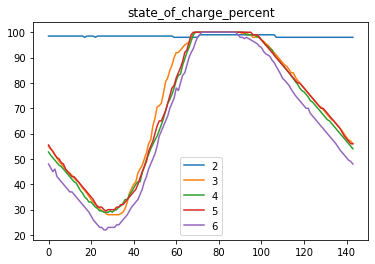

In [25]:
df = df.reset_index().set_index('timestamp')

n = 10
randoms_ids = np.random.choice(df.battery_id.unique(), n)

for bat_id in randoms_ids:
    subset = df[df['battery_id'] == bat_id].copy()
    subset['month'] = subset.index.month
    months = subset.month.unique()
    months.sort()

    '''     plt.figure()
    plt.title('power_out')
    for mo in months:
        subset_month = subset[subset['month'] == mo]
        daily_median_profiles = subset_month.groupby(['battery_id','hour','minutes']).median()
        plt.plot(daily_median_profiles['power_out'].values, label = mo)
        plt.legend() '''

    plt.figure()
    plt.title('state_of_charge_percent')
    for mo in months:
        subset_month = subset[subset['month'] == mo]
        daily_median_profiles = subset_month.groupby(['battery_id','hour','minutes']).median()
        plt.plot(daily_median_profiles['state_of_charge_percent'].values, label = mo)
        plt.legend()

# legacy

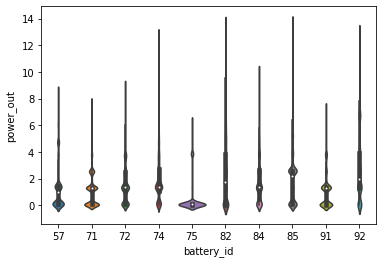

In [31]:
n = 10
randoms_ids = np.random.choice(df.battery_id.unique(), n)

subset = df[df['battery_id'].isin(randoms_ids)]

sns.violinplot(data = subset, x = 'battery_id', y="power_out")

weekly_median_profiles = subset.groupby(['battery_id','day_n','hour','minutes']).median()
daily_median_profiles = subset.groupby(['battery_id','hour','minutes']).median()

<AxesSubplot:xlabel='hour,minutes'>

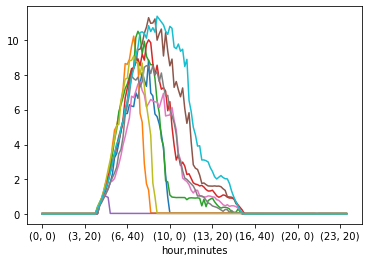

<Figure size 432x288 with 0 Axes>

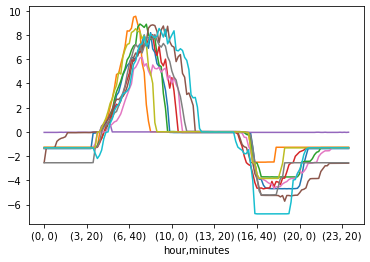

<Figure size 432x288 with 0 Axes>

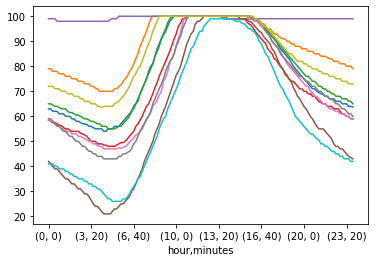

In [38]:
daily_median_profiles['power_in'].unstack(level = 0).sort_index().plot(subplots = False, legend = False)

plt.figure()

daily_median_profiles['net_power_battery'].unstack(level = 0).sort_index().plot(subplots = False, legend = False)

plt.figure()

daily_median_profiles['state_of_charge_percent'].unstack(level = 0).sort_index().plot(subplots = False, legend = False)

<AxesSubplot:>

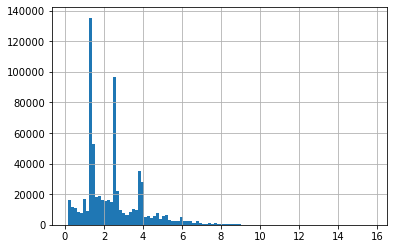

In [43]:
df[df['current_out'] > 2e-2].power_out.hist(bins = 100)

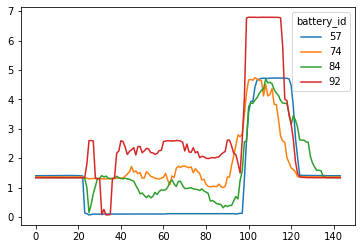

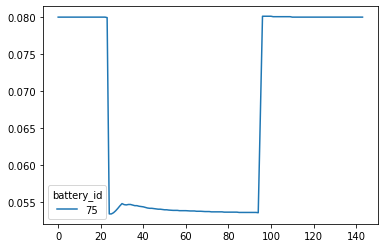

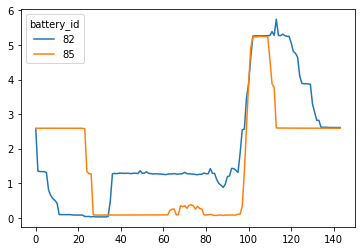

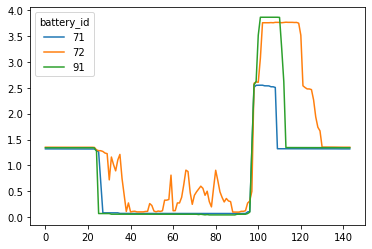

In [44]:
from tslearn.clustering import TimeSeriesKMeans

n_clusters = 4
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", max_iter=10)
power_out_shape = daily_median_profiles['power_out'].unstack(level = 0).sort_index().reset_index(drop=True).transpose()
classes = model.fit_predict(power_out_shape)
power_out_shape['classes'] = classes
power_out_shape = power_out_shape.reset_index().set_index(['classes','battery_id'])
for k in range(n_clusters):
    df_plot = power_out_shape.loc[k].transpose()
    df_plot.plot()

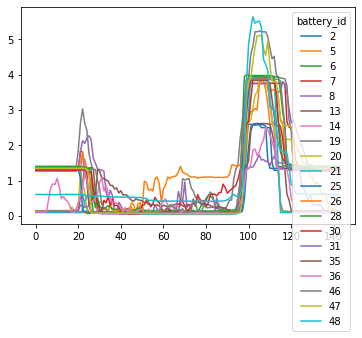

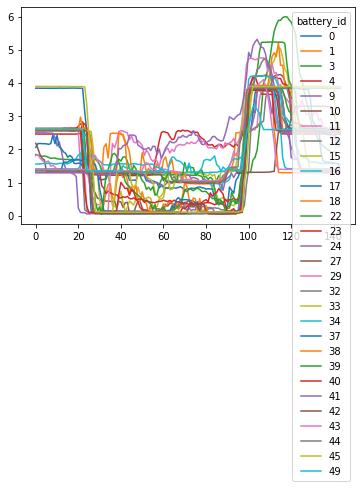

In [ ]:
n_clusters = 2
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", max_iter=10)
power_out_shape = median_profiles['power_out'].unstack(level = 0).sort_index().reset_index(drop=True).transpose()
classes = model.fit_predict(power_out_shape)
power_out_shape['classes'] = classes
power_out_shape = power_out_shape.reset_index().set_index(['classes','battery_id'])
for k in range(n_clusters):
    df_plot = power_out_shape.loc[k].transpose()
    df_plot.plot()

In [ ]:
df_charging = df[df['current'] < -2e-1]

In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='battery_id', ylabel='current_in'>

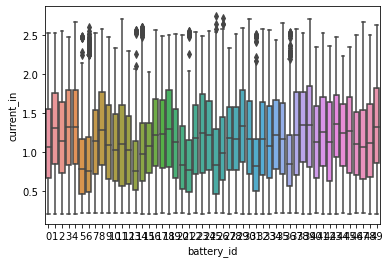

In [ ]:
sns.boxplot(data = df_charging, x = 'battery_id', y = 'current_in')